In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins

In [2]:
#importing csv
data = pd.read_csv('resources/fire_nrt_V1_96617.csv')
sample_data = data.iloc[np.random.choice(data.index, 1000)]
data.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


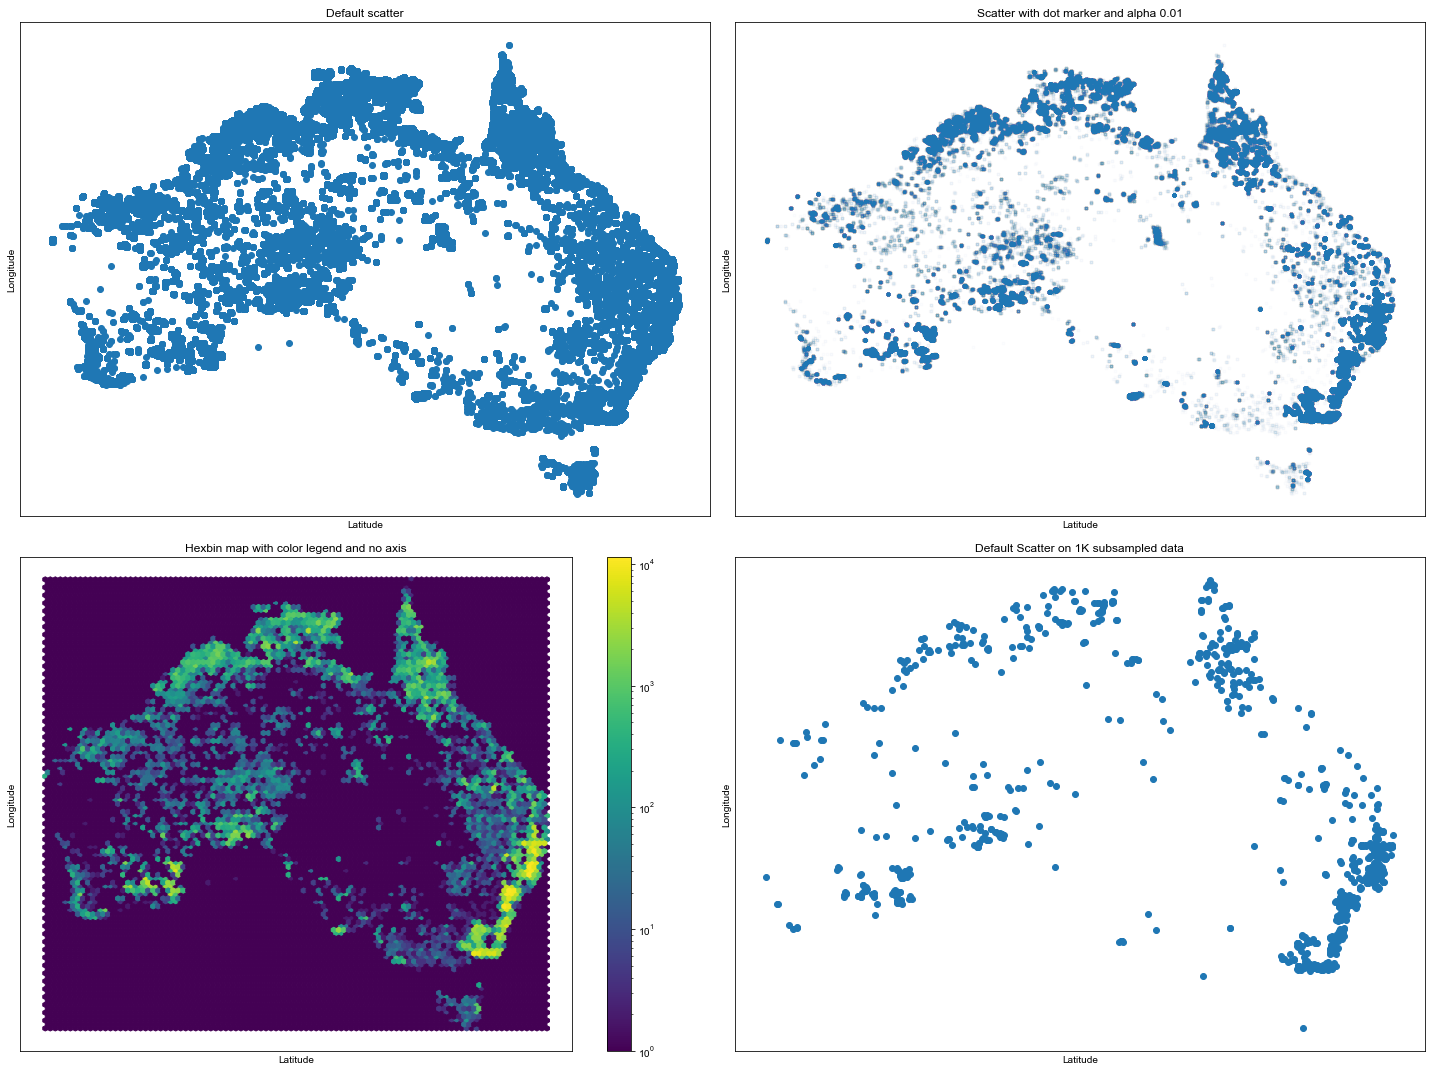

In [3]:
#displaying subplots of scatter plots
fig, axes = plt.subplots(2,2, figsize =(20,15), subplot_kw={'xticks': (), 'yticks': ()})
axes[0,0].scatter(data.longitude,data.latitude)
axes[0,0].set_title("Default scatter")
axes[0,1].scatter(data.longitude,data.latitude, alpha=0.01, marker=".")
axes[0,1].set_title("Scatter with dot marker and alpha 0.01")
img = axes[1,0].hexbin(data.longitude,data.latitude, bins='log')
axes[1,0].set_title("Hexbin map with color legend and no axis")
axes[1,1].scatter(sample_data.longitude, sample_data.latitude)
axes[1,1].set_title("Default Scatter on 1K subsampled data")
for ax in axes.ravel():
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
plt.tight_layout()

fig.colorbar(img, ax=axes[1,0])
sns.set_style('dark')
plt.show()

In [4]:
f = folium.Figure(width=1000, height=500)
center_lat = -24.003249 
center_long = 133.737310
m = folium.Map(location=[center_lat,center_long], control_scale=True, zoom_start=4,width=750, height=500,zoom_control=True).add_to(f)
for i in range(0,sample_data.shape[0]):    
    location=[sample_data.iloc[i]['latitude'], sample_data.iloc[i]['longitude']]
    folium.CircleMarker(location,radius=1,color='red').add_to(m)
m

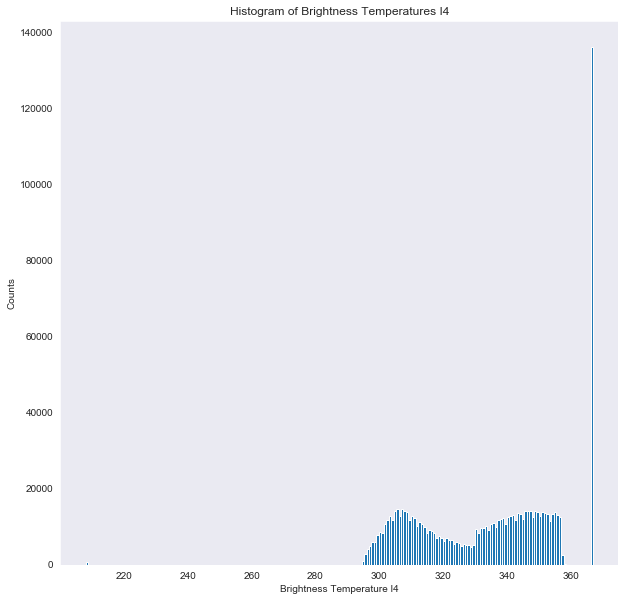

In [5]:
#Histogram of Brightness
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.hist(data.bright_ti4,bins='auto');
ax.set_title("Histogram of Brightness Temperatures I4");
ax.set_xlabel("Brightness Temperature I4");
ax.set_ylabel("Counts");
fig.savefig('Histogram.png')

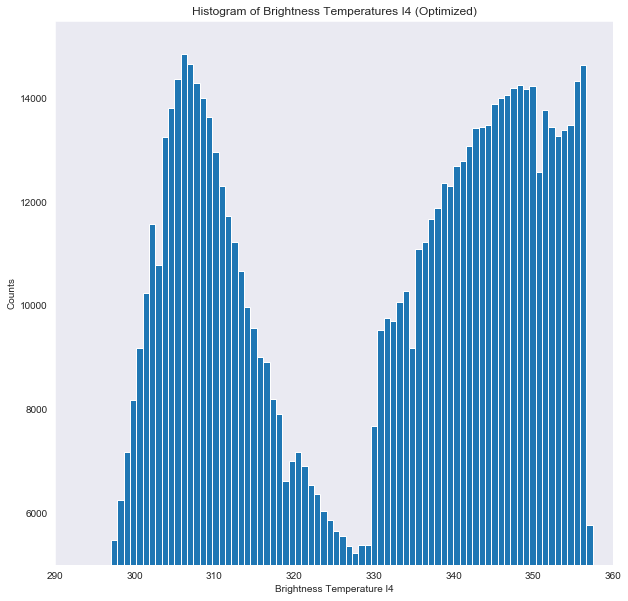

In [6]:
#cleaning and optimizing map for better use of plot space
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.hist(data.bright_ti4,bins=200);
ax.set_xlim(290,360);
ax.set_ylim(5000,1.55e4);
ax.set_title("Histogram of Brightness Temperatures I4 (Optimized)");
ax.set_xlabel("Brightness Temperature I4");
ax.set_ylabel("Counts");
fig.savefig('OptimizedHistogram.png')

In [7]:
#masking data to provide easier data sets
mask = data['bright_ti4'] >= 330
sat_df = data[mask]
unsat_df = data[~mask]

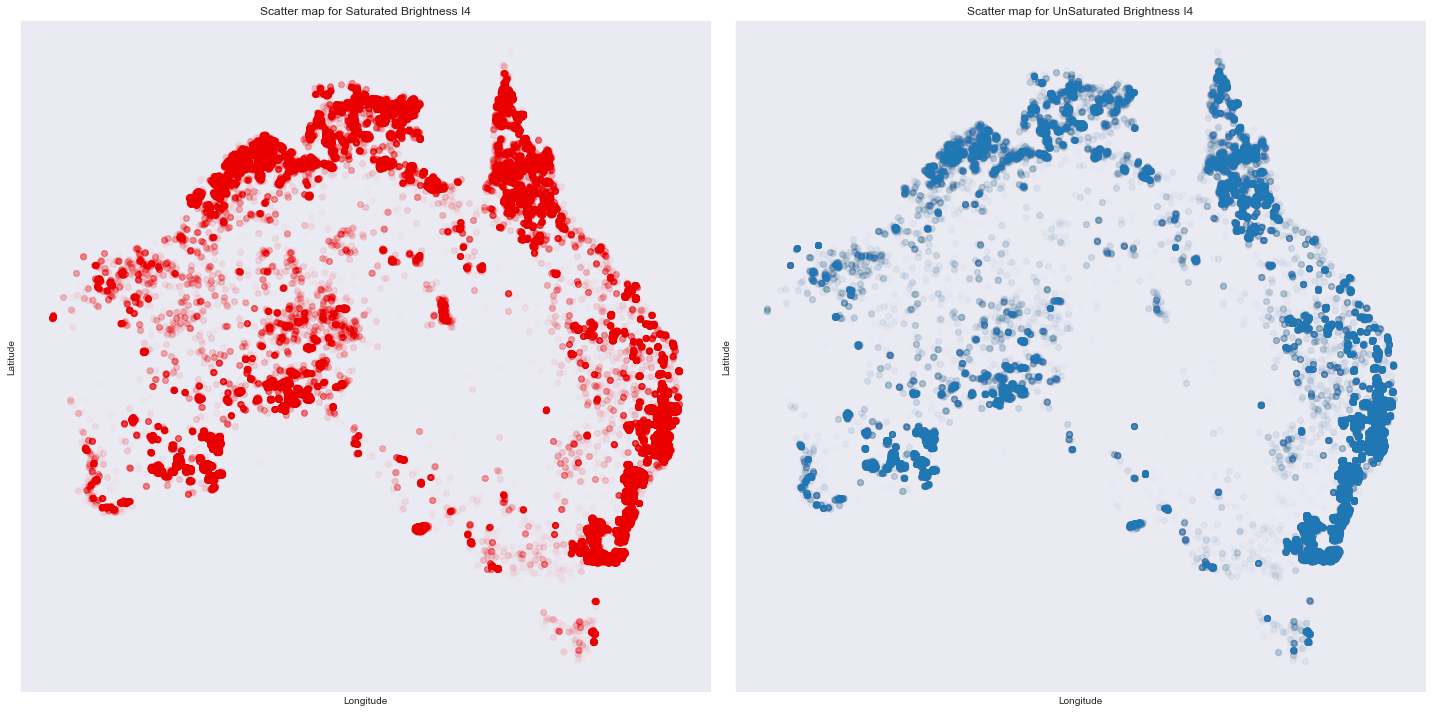

In [8]:
#Creating Visualizations for saturated and unsaturated counts of temperatures greater than 
#or equal to 330 on NASA's I4 channel

fig, axes = plt.subplots(1,2, figsize =(20,10), subplot_kw={'xticks': (), 'yticks': ()})
img = axes[0].scatter(sat_df.longitude,sat_df.latitude, alpha=0.01, color='red')
axes[0].set_title("Scatter map for Saturated Brightness I4")
img = axes[1].scatter(unsat_df.longitude,unsat_df.latitude, alpha=0.01)
axes[1].set_title("Scatter map for UnSaturated Brightness I4")

for ax in axes.ravel():
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
plt.tight_layout()
#fig.colorbar(img, ax=axes[1])
plt.show()
fig.savefig('SatScatter.png')

---